In [2]:
# Author: Kaan Çembertaş
# No: 200001684

In [1]:
from cv2 import cv2
from matplotlib import pyplot as plt
import numpy as np
import math

### Reading images

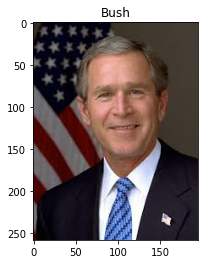

In [156]:
bush_image = cv2.imread("./bush.jpg")
bush_image = cv2.cvtColor(bush_image, cv2.COLOR_BGR2RGB)

plt.imshow(bush_image)
plt.title('Bush')
plt.show()

### Converting to gray scale

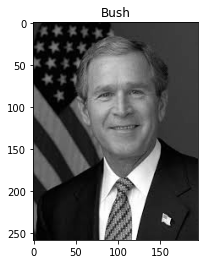

In [157]:
bush_gray = cv2.cvtColor(bush_image, cv2.COLOR_RGB2GRAY)

plt.imshow(bush_gray,cmap='gray')
plt.title('Bush')
plt.show()

### Loading model

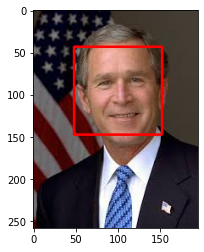

In [158]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalcatface_default.xml')
    
bush_face = face_cascade.detectMultiScale(bush_gray, 1.3, 5)[0]
x,y,w,h = bush_face
cv2.rectangle(bush_image, (x, y), (x+w, y+h), (255, 0, 0), 2)

plt.imshow(bush_image)
plt.show()

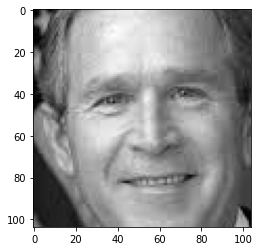

(104, 104)
<class 'numpy.ndarray'>


In [159]:
cropped = bush_gray[y:y+h, x:x+w]
plt.imshow(cropped,cmap='gray')
plt.show()

print(cropped.shape)
print(type(cropped))


### Applying LBP operation
#### Parameters:
- Radius: 1
- Neighbors: 8
- Grid X: 8
- Grid Y:8

In [160]:
rows,cols = cropped.shape
patternImage = np.zeros((rows,cols))

for row in range(rows):
    for col in range(cols):
        subMatrix = cropped[row-1:row+2,col-1:col+2].copy()
        subRows, subColumns = subMatrix.shape
       
        if subRows!=3 or subColumns!=3:
            continue
        
        threshold = subMatrix[1,1]
        binary = ''
        for subRow in range(3):
            for subColumn in range(3):
                if(subRow == 1 and subColumn == 1):
                    continue
                elif(subMatrix[subRow,subColumn] < threshold):
                    binary += '0'
                else:
                    binary += '1'
        patternImage[row,col] = int(binary,2)

patternImage = patternImage.astype(int)

### LBP Result of the image

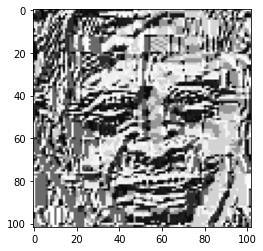

In [161]:
patternImage = patternImage[1:rows-1,1:cols-1].copy()
plt.imshow(patternImage,cmap='gray')
plt.show()

### Regions & Grids

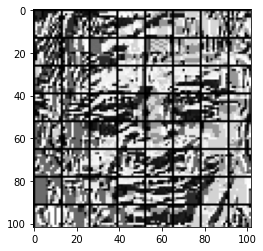

In [162]:
gridX = 8
gridY = 8

width, height = patternImage.shape
offsetX = math.ceil(width/gridX)
offsetY = math.ceil(height/gridY)
patternImageCopy = patternImage.copy()

cellLocations = []

for i in range(gridX):
    for j in range(gridY):
        cellLocations.append((i*offsetX,j*offsetY))

for x,y in cellLocations:
    cv2.rectangle(patternImageCopy, (x, y), (x+offsetX, y+offsetY), (0, 0, 0), 1)

plt.imshow(patternImageCopy,cmap='gray')
plt.show()

### Extracting histogram of each region

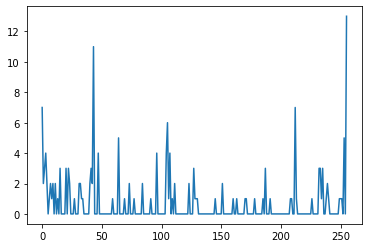

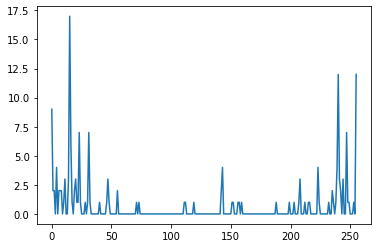

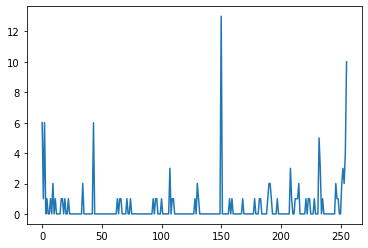

In [163]:
histogramArray = []

for x,y in cellLocations:
    region = patternImage[y:y+offsetY,x:x+offsetX]
    histogram,_ = np.histogram(region,bins=256)
    histogramArray.append(histogram)

plt.plot(histogramArray[0])
plt.show()

plt.plot(histogramArray[19])
plt.show()

plt.plot(histogramArray[63])
plt.show()

### Extracting face features by histograms

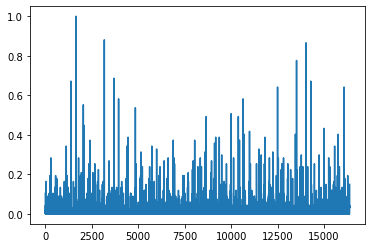

Face feature vector of Bush: [0.10447761 0.02985075 0.04477612 ... 0.02985075 0.05970149 0.14925373]
Length of the features: 16384


In [166]:
faceFeatures = np.array([])

for histogram in histogramArray:
    faceFeatures = np.concatenate((faceFeatures,histogram))

# Normalize the features
amax = np.amax(faceFeatures)
amin = np.amin(faceFeatures)
for i,_ in enumerate(faceFeatures):
    faceFeatures[i] = (faceFeatures[i]-amin) / (amax-amin)

    
plt.plot(faceFeatures)
plt.show()

print("Face feature vector of Bush:",faceFeatures)
print("Length of the features:",len(faceFeatures))